In [2]:
#L&S Student Success Analytics

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib as plt
from pandas_profiling import ProfileReport

In [4]:
springdata = pd.read_csv("sp19_data.csv")
springdata = springdata.drop('Unnamed: 0', axis=1)

In [6]:
springdata

,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
0,2019 Spring,81b3a8c2fec32350f316d5885a84f97e3ddd50019353e4...,AD,2,History,3.213,23.0,11.0,3.0,36.3
1,2019 Spring,2dab3f668525d749f893bffbdd663b2bbf872525b8691b...,AD,4,L&S Undeclared,3.052,23.0,16.0,NaN,49.2
2,2019 Spring,f2751edfb91c88e7d8d4554460778dbab4b035afdd66ae...,AD,3,-,2.624,21.0,NaN,NaN,NaN
3,2019 Spring,43ebc54ce244f1e20063c73b4007e641416d78a1ae9c5b...,NF,4,UG Interdisciplinary Studies,2.895,99.0,11.0,2.0,40.7
4,2019 Spring,3779363bb94f9a14b9df6b147236b9bc50901dbaf322fb...,NF,4,Integrative Biology,2.501,74.0,7.0,NaN,17.0
...,...,...,...,...,...,...,...,...,...,...
1418,2019 Spring,15a86ab14081d09bb6c68b2c619369c481472f4adc47fa...,NF,2,L&S Undeclared,3.967,28.0,12.0,1.0,47.1
1419,2019 Spring,cada315cd568caf3b68e5ea809701194adec190c271ae3...,AD,3,L&S Undeclared,2.960,20.0,8.0,6.0,26.8
1420,2019 Spring,01e514b06c4c537012ff69726206155174d67ddb2985af...,AD,4,Earth & Planetary Science,3.264,25.0,15.0,NaN,50.8
1421,2019 Spring,3f52c237c241c531226e34cdd17a08cff5768c5ed4d505...,AD,3,L&S Undeclared,1.934,23.0,12.0,2.0,21.6


In [7]:
springdata.describe()

,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
count,1423.000000,1423.000000,1359.000000,770.000000,1359.000000
mean,3.020617,45.380885,11.767476,2.838961,36.947388
std,0.627605,23.872609,3.644960,1.948302,14.836840
min,0.000000,0.000000,2.000000,0.500000,2.100000
25%,2.660500,24.000000,9.000000,1.000000,26.400000
50%,3.088000,47.000000,12.000000,2.000000,36.400000
75%,3.486000,66.000000,14.000000,4.000000,46.400000
max,4.000000,115.000000,25.000000,12.000000,96.700000


In [8]:
springdata.isna().any()

Semester Year Name Concat               False
Student Id                              False
Entry Status Cd                         False
Educ Non Exam Level Cd                  False
Academic Department Short Nm - Major    False
Cum Gpa No                              False
Cum Ucb Letgrd Units No                 False
Eot Term Letgrd Units Complete           True
Eot Term Pnp Units Completed             True
Eot Trm Tot Letgrd Grd Pnts No           True
dtype: bool

In [9]:
springdata.iloc[:,3].value_counts()

4    934
3    396
2     91
-      2
Name: Educ Non Exam Level Cd, dtype: int64

In [10]:
springdata[springdata.iloc[:,3]=='-']

,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
20,2019 Spring,57d793e9dedcd01a233675a14e0d574e21fafbd82af33c...,NF,-,L&S Undeclared,1.882,23.0,12.0,1.0,32.0
154,2019 Spring,d1d087604034ccf932932246581b934c57c51318526d30...,NF,-,L&S Undeclared,2.497,59.0,NaN,1.0,NaN


In [11]:
springdata.replace(to_replace='-',value='0',inplace=True)

In [12]:
springdata.isna().sum()

Semester Year Name Concat                 0
Student Id                                0
Entry Status Cd                           0
Educ Non Exam Level Cd                    0
Academic Department Short Nm - Major      0
Cum Gpa No                                0
Cum Ucb Letgrd Units No                   0
Eot Term Letgrd Units Complete           64
Eot Term Pnp Units Completed            653
Eot Trm Tot Letgrd Grd Pnts No           64
dtype: int64

In [13]:
sophdata = springdata[springdata.iloc[:,3].astype(int)==2]

In [14]:
sophdata.groupby('Academic Department Short Nm - Major').size().sort_values()

Academic Department Short Nm - Major
0                                 1
Earth & Planetary Science         1
History                           1
Integrative Biology               1
Interdisc Social Science Pgms     1
L&S Computer Science              1
Mathematics                       1
UG Interdisciplinary Studies      1
L&S Legal Studies                 2
L&S Undeclared                   81
dtype: int64

In [15]:
sophdata.shape

(91, 10)

In [16]:
sophdata

,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
0,2019 Spring,81b3a8c2fec32350f316d5885a84f97e3ddd50019353e4...,AD,2,History,3.213,23.0,11.0,3.0,36.3
36,2019 Spring,a5055fa1f57160019931fa47d595efbaa25d107d3eef99...,NF,2,L&S Undeclared,2.519,61.0,NaN,3.0,NaN
37,2019 Spring,4633b23602bd29219669a0ec72c1dfcf1ee3d26aba101b...,NF,2,Interdisc Social Science Pgms,3.148,50.0,20.0,NaN,74.4
254,2019 Spring,00289053f169dff564e196328b98245010498f52498880...,NF,2,L&S Undeclared,1.780,33.0,14.0,NaN,38.0
536,2019 Spring,4aad8d89faf7d95802520612057b04021b603182a7b15e...,NF,2,L&S Undeclared,2.317,30.0,7.0,4.0,19.8
...,...,...,...,...,...,...,...,...,...,...
1414,2019 Spring,4d61532b4c72aee29cf264aabd0d008cde93cf50d102fb...,NF,2,L&S Undeclared,3.850,16.0,8.0,5.0,30.8
1415,2019 Spring,70c142da332b0d0fdc2605838ae05dbb46a75ba990142b...,NF,2,L&S Undeclared,3.544,18.0,10.0,3.0,33.0
1416,2019 Spring,cda114190f4c87fe8c3440c9c297020878c86c1177ed7a...,NF,2,L&S Undeclared,3.857,21.0,11.0,2.0,41.0
1417,2019 Spring,253a8b58c5c63c931403df47cd6a43864d4b1d52d5cc35...,NF,2,L&S Undeclared,3.100,30.0,13.0,NaN,36.5


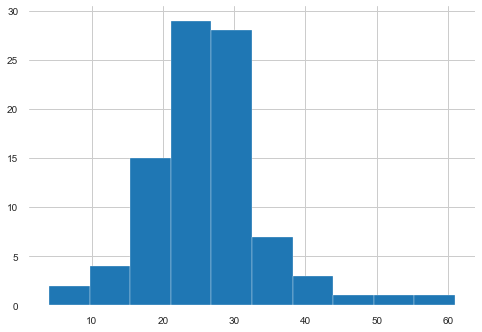

In [17]:
sophdata['Cum Ucb Letgrd Units No'].hist();

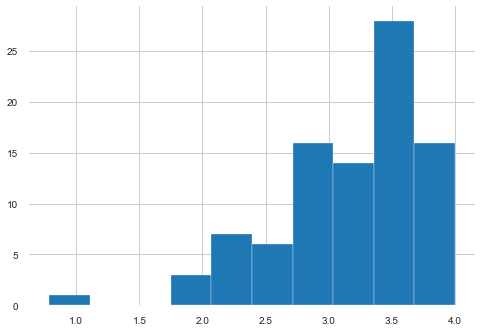

In [18]:
sophdata['Cum Gpa No'].hist();

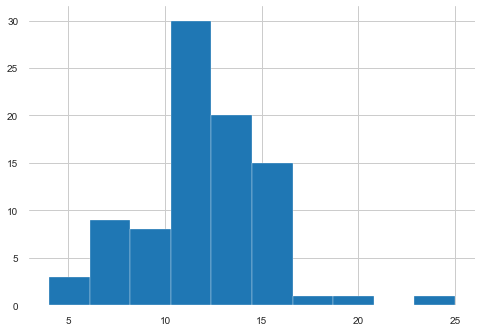

In [19]:
sophdata['Eot Term Letgrd Units Complete'].hist();

In [20]:
(springdata['Cum Ucb Letgrd Units No'].astype(float))/(springdata['Educ Non Exam Level Cd'].astype(float))

0       11.500000
1        5.750000
2        7.000000
3       24.750000
4       18.500000
          ...    
1418    14.000000
1419     6.666667
1420     6.250000
1421     7.666667
1422     5.750000
Length: 1423, dtype: float64

In [21]:
sophdata[sophdata['Eot Term Letgrd Units Complete']<8]

,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
536,2019 Spring,4aad8d89faf7d95802520612057b04021b603182a7b15e...,NF,2,L&S Undeclared,2.317,30.0,7.0,4.0,19.8
1022,2019 Spring,5de3e98cc729a58c5d8eec372391a11278df864eb35f9e...,NF,2,L&S Undeclared,3.925,16.0,4.0,9.5,14.8
1121,2019 Spring,6ad5d4105a0b939b0f7fa255720c60c2f95b1ce305a646...,NF,2,L&S Undeclared,2.505,16.0,7.0,2.0,18.2
1181,2019 Spring,21c903a765552ac9f929caf2334068234a7e99a16765ae...,NF,2,L&S Undeclared,3.231,22.0,7.0,4.0,24.0
1319,2019 Spring,0a77de174ae5167d49763dd8a510a437a61b407133678e...,NF,2,L&S Undeclared,3.583,30.0,7.0,6.0,28.0
1347,2019 Spring,bcf4f272511fad68a670e689d81fea7e6cafccbf41c397...,NF,2,L&S Undeclared,1.810,15.0,4.0,1.0,6.8
1405,2019 Spring,56005f81c935e80bd81cea196f539e05d816c6a89f3a1b...,NF,2,L&S Undeclared,3.207,13.5,4.0,2.0,12.0


In [22]:
sophdata.corr()

,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
Cum Gpa No,1.000000,0.177431,0.102384,0.223429,0.525561
Cum Ucb Letgrd Units No,0.177431,1.000000,0.536635,-0.119405,0.513217
Eot Term Letgrd Units Complete,0.102384,0.536635,1.000000,-0.351883,0.849209
Eot Term Pnp Units Completed,0.223429,-0.119405,-0.351883,1.000000,-0.184867
Eot Trm Tot Letgrd Grd Pnts No,0.525561,0.513217,0.849209,-0.184867,1.000000


## Preliminary Categories of students who received UD75 hold

1. Avoiding paperwork
2. Didn't meet criteria for primary major, now shifting to a secondary major
3. Likes to take a lot of units, but not a second-year Sophomore yet
4. Considering too many major options, doesn't have more than half of the prereqs completed for one major yet\
5. Recently shifted to L&S from another college
6. Transfer student

In [23]:
sophdata['Eot Term Letgrd Units Complete'].dropna()

0       11.0
37      20.0
254     14.0
536      7.0
622     12.0
        ... 
1414     8.0
1415    10.0
1416    11.0
1417    13.0
1418    12.0
Name: Eot Term Letgrd Units Complete, Length: 88, dtype: float64

In [24]:
sophdata

,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
0,2019 Spring,81b3a8c2fec32350f316d5885a84f97e3ddd50019353e4...,AD,2,History,3.213,23.0,11.0,3.0,36.3
36,2019 Spring,a5055fa1f57160019931fa47d595efbaa25d107d3eef99...,NF,2,L&S Undeclared,2.519,61.0,NaN,3.0,NaN
37,2019 Spring,4633b23602bd29219669a0ec72c1dfcf1ee3d26aba101b...,NF,2,Interdisc Social Science Pgms,3.148,50.0,20.0,NaN,74.4
254,2019 Spring,00289053f169dff564e196328b98245010498f52498880...,NF,2,L&S Undeclared,1.780,33.0,14.0,NaN,38.0
536,2019 Spring,4aad8d89faf7d95802520612057b04021b603182a7b15e...,NF,2,L&S Undeclared,2.317,30.0,7.0,4.0,19.8
...,...,...,...,...,...,...,...,...,...,...
1414,2019 Spring,4d61532b4c72aee29cf264aabd0d008cde93cf50d102fb...,NF,2,L&S Undeclared,3.850,16.0,8.0,5.0,30.8
1415,2019 Spring,70c142da332b0d0fdc2605838ae05dbb46a75ba990142b...,NF,2,L&S Undeclared,3.544,18.0,10.0,3.0,33.0
1416,2019 Spring,cda114190f4c87fe8c3440c9c297020878c86c1177ed7a...,NF,2,L&S Undeclared,3.857,21.0,11.0,2.0,41.0
1417,2019 Spring,253a8b58c5c63c931403df47cd6a43864d4b1d52d5cc35...,NF,2,L&S Undeclared,3.100,30.0,13.0,NaN,36.5


## Summary Statistics

In [25]:
sp18_data = pd.read_csv('Sp18UD75_hashed.csv')
fa17_data = pd.read_csv('Fa17UD75_hashed.csv')
fa18_data = pd.read_csv('Fa18UD75_hashed.csv')
fa19_data = pd.read_csv('Fa19UD75_hashed.csv')

springdata = springdata.append(sp18_data).append(fa17_data).append(fa18_data).append(fa19_data)

In [26]:
springdata['Entry Status Cd'].value_counts()

NF    4896
AD    3143
LM       6
0        1
-        1
Name: Entry Status Cd, dtype: int64

In [27]:
springdata['Educ Non Exam Level Cd'].value_counts()

3    3387
4    2886
3     869
2     343
4     318
2     167
-      52
1      21
0       2
1       2
Name: Educ Non Exam Level Cd, dtype: int64

#### People declaring by the end of semester

In [31]:
np.count_nonzero(springdata['Academic Department Short Nm - Major']!='L&S Undeclared')

3507

In [32]:
springdata['Academic Department Short Nm - Major'].value_counts()

L&S Undeclared                    4540
Molecular & Cell Biology           674
Interdisc Social Science Pgms      430
Mathematics                        314
UG Interdisciplinary Studies       255
Integrative Biology                232
L&S Legal Studies                  145
L&S Data Science                   127
Sociology                          125
Political Science                  113
English                             94
-                                   87
Ag & Resource Econ & Pol            86
Art Practice                        69
Film and Media                      67
Economics                           60
History                             54
Physics                             51
L&S Computer Science                39
Rhetoric                            35
Theater Dance & Perf Stds           34
History of Art                      27
Env Sci, Policy, & Mgmt             27
Psychology                          24
Earth & Planetary Science           24
Astronomy                

In [33]:
holdfreq = springdata.groupby('Student Id').size()
holdfreq_col = [holdfreq[x] for x in list(springdata['Student Id'])]
springdata['Hold Frequency'] = holdfreq_col
multihold = springdata[springdata['Hold Frequency']>1].groupby('Student Id').first()

Mean GPA: 2.933013741411614


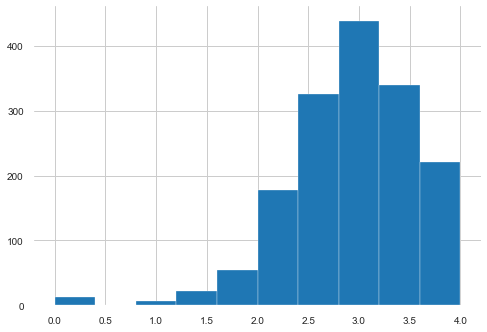

In [34]:
multihold['Cum Gpa No'].hist();
print("Mean GPA: " + str(np.mean(multihold['Cum Gpa No'])))

In [35]:
singlehold = [x for x in springdata['Student Id'] if x not in list(multihold.index)]
ifsingle = [(x in singlehold) for x in springdata['Student Id']]
springdata['ifsingle'] = ifsingle
onehold = springdata[springdata['ifsingle']==True]

In [36]:
onehold

,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Unnamed: 0,Hold Frequency,ifsingle
0,2019 Spring,81b3a8c2fec32350f316d5885a84f97e3ddd50019353e4...,AD,2,History,3.213,23.0,11.0,3.0,36.3,NaN,1,True
1,2019 Spring,2dab3f668525d749f893bffbdd663b2bbf872525b8691b...,AD,4,L&S Undeclared,3.052,23.0,16.0,NaN,49.2,NaN,1,True
5,2019 Spring,3b809579b5aebb851a47176492fb74e8826e1e0f681812...,NF,4,L&S Undeclared,2.526,70.0,11.0,2.0,36.0,NaN,1,True
8,2019 Spring,88b085110be681938824ca18fc305ee5215bbe3936559b...,NF,4,L&S Legal Studies,2.837,68.0,12.0,1.0,44.0,NaN,1,True
10,2019 Spring,400f092ba3334d9b8d3519b9e94404320178f2c0cabfa8...,AD,4,L&S Legal Studies,2.358,31.0,15.0,1.0,51.8,NaN,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,2019 Fall,3d6c7e42d2511aeec3a7f08121d43de8c044137da74aa4...,AD,3,Sociology,3.638,44.0,15.0,1.0,57.3,1351.0,1,True
1352,2019 Fall,68f847a091a65bf0b4695b23d676b1bd228f360be07968...,AD,3,L&S Undeclared,2.461,13.0,3.0,6.0,6.0,1352.0,1,True
1353,2019 Fall,44587860a4184da163fabbd50a85e9bec894155c3fcc59...,AD,3,L&S Undeclared,2.825,27.0,12.0,2.0,33.2,1353.0,1,True
1354,2019 Fall,023e91c439947796a584a1b0654aa38babba050f0ed408...,AD,3,L&S Undeclared,3.160,30.0,14.0,2.0,48.0,1354.0,1,True


3.153569801867463

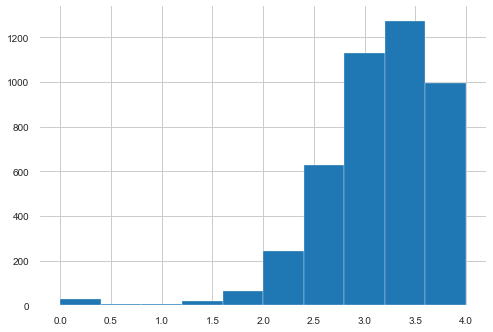

In [37]:
onehold['Cum Gpa No'].hist();
np.mean(onehold['Cum Gpa No'])

In [38]:
np.mean(multihold['Eot Term Letgrd Units Complete'])

11.111705475141598

In [39]:
np.mean(onehold['Eot Term Letgrd Units Complete'])

11.839380633233187

In [48]:
threehold = multihold[multihold['Hold Frequency']==3]
twohold = multihold[multihold['Hold Frequency']==2]

Hold Frequency : 3
Mean 10.532806324110673


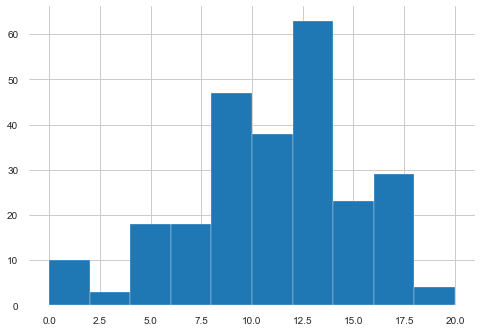

In [56]:
print('Hold Frequency : 3')
threehold['Eot Term Letgrd Units Complete'].hist();
print("Mean " + str(threehold['Eot Term Letgrd Units Complete'].mean()))

Hold Frequency : 2
Mean 11.367441860465117


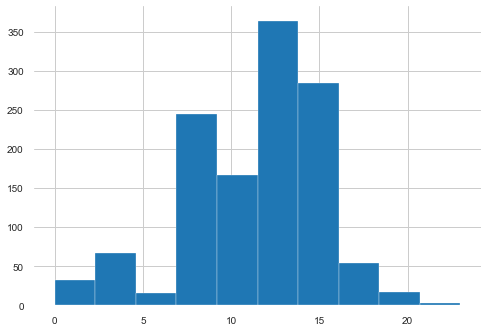

In [57]:
print('Hold Frequency : 2')
twohold['Eot Term Letgrd Units Complete'].hist();
print("Mean " + str(twohold['Eot Term Letgrd Units Complete'].mean()))

Hold Frequency : 1
Mean 11.839380633233187


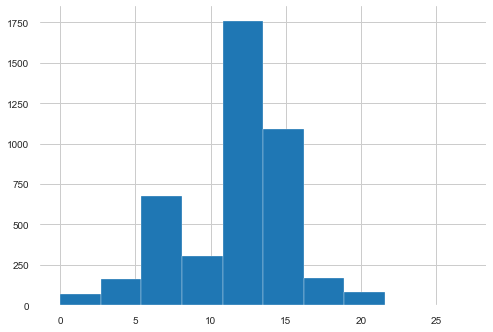

In [58]:
print('Hold Frequency : 1')
onehold['Eot Term Letgrd Units Complete'].hist();
print("Mean " + str(onehold['Eot Term Letgrd Units Complete'].mean()))

In [60]:
onehold.shape

(4391, 13)

In [61]:
multihold.shape

(1601, 11)

In [ ]:
#Try to see if multihold students got the hold in consecutive semesters